<a href="https://colab.research.google.com/github/Juliennnd/TP3_ML/blob/main/TP3_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Number of cat images in train directory: 279
Number of dog images in train directory: 278
Number of cat images in validation directory: 70
Number of dog images in validation directory: 70


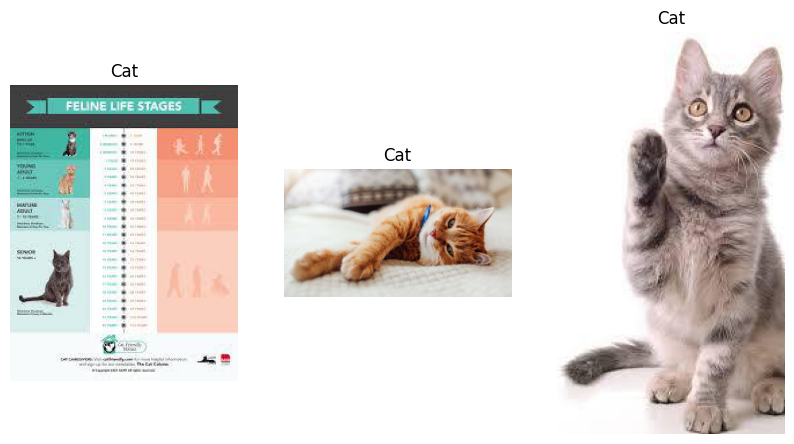

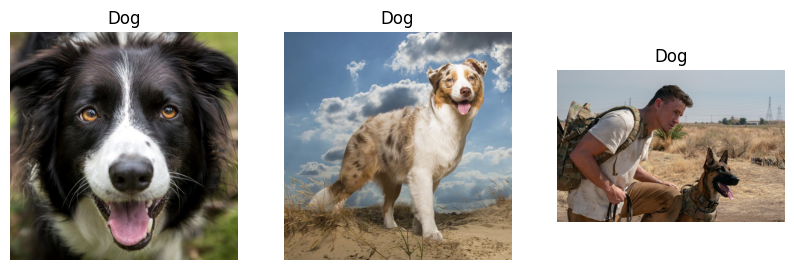

In [21]:
import tensorflow as tf
import os
import numpy as np

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from google.colab import drive

import matplotlib.pyplot as plt
from PIL import Image


#drive.mount('/content/drive')

# Define the path to the folder containing the labeled images
train_data_dir ='/content/drive/MyDrive/TP3_ML/cats_and_dogs/train'
testing_data_dir = '/content/drive/MyDrive/TP3_ML/cats_and_dogs/test'

cat_dir = os.path.join(train_data_dir, 'cats')
dog_dir = os.path.join(train_data_dir, 'dogs')

# Count the number of images per class
cat_count_train = len(os.listdir(os.path.join(train_data_dir, 'cats')))
dog_count_train = len(os.listdir(os.path.join(train_data_dir, 'dogs')))

cat_count_testing = len(os.listdir(os.path.join(testing_data_dir, 'cats')))
dog_count_testing = len(os.listdir(os.path.join(testing_data_dir, 'dogs')))


print("Number of cat images in train directory:", cat_count_train)
print("Number of dog images in train directory:", dog_count_train)

print("Number of cat images in validation directory:", cat_count_testing)
print("Number of dog images in validation directory:", dog_count_testing)


# Plot 3 cat images
fig = plt.figure(figsize=(10,10))
for i in range(3):
    cat_file = os.listdir(cat_dir)[i]
    cat_path = os.path.join(cat_dir, cat_file)
    cat_img = Image.open(cat_path)
    ax = fig.add_subplot(1, 3, i+1)
    ax.imshow(cat_img)
    ax.axis('off')
    ax.set_title('Cat')

# Plot 3 dog images
fig = plt.figure(figsize=(10,10))
for i in range(3):
    dog_file = os.listdir(dog_dir)[i]
    dog_path = os.path.join(dog_dir, dog_file)
    dog_img = Image.open(dog_path)
    ax = fig.add_subplot(1, 3, i+1)
    ax.imshow(dog_img)
    ax.axis('off')
    ax.set_title('Dog')

plt.show()


In [22]:
# Define constants
img_width, img_height = 150, 150
batch_size = 32
epochs = 10


train_datagen = ImageDataGenerator(rescale=1./255)
testing_datagen = ImageDataGenerator(rescale=1./255)

# Define training and testing generators
train_generator = train_datagen.flow_from_directory(
        train_data_dir,
        target_size=(img_width, img_height),
        batch_size=batch_size,
        class_mode='binary')

testing_generator = testing_datagen.flow_from_directory(
        testing_data_dir,
        target_size=(img_width, img_height),
        batch_size=batch_size,
        class_mode='binary')

# Define the model architecture & compile
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(img_width, img_height, 3)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])


# Train the model
history = model.fit_generator(
        train_generator,
        steps_per_epoch=len(train_generator),
        epochs=epochs,
        validation_data=testing_generator,
        validation_steps=len(testing_generator))


# Save the model
save_path = '/content/drive/MyDrive/TP3_ML/CNN_model_chat_chien.h5'
model.save(save_path)



Found 557 images belonging to 2 classes.
Found 140 images belonging to 2 classes.


<ipython-input-22-035e73ee0cce>:37: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(


Epoch 1/10
18/18 [==============================] - 24s 1s/step - loss: 3.9886 - accuracy: 0.5332 - val_loss: 0.9621 - val_accuracy: 0.5000
Epoch 2/10
18/18 [==============================] - 23s 1s/step - loss: 0.7930 - accuracy: 0.5763 - val_loss: 0.7419 - val_accuracy: 0.5429
Epoch 3/10
18/18 [==============================] - 23s 1s/step - loss: 0.5771 - accuracy: 0.6804 - val_loss: 0.7229 - val_accuracy: 0.5500
Epoch 4/10
18/18 [==============================] - 23s 1s/step - loss: 0.4741 - accuracy: 0.8312 - val_loss: 0.6710 - val_accuracy: 0.6357
Epoch 5/10
18/18 [==============================] - 20s 1s/step - loss: 0.3744 - accuracy: 0.8815 - val_loss: 0.8195 - val_accuracy: 0.5714
Epoch 6/10
18/18 [==============================] - 23s 1s/step - loss: 0.3866 - accuracy: 0.8833 - val_loss: 0.6734 - val_accuracy: 0.6357
Epoch 7/10
18/18 [==============================] - 23s 1s/step - loss: 0.2630 - accuracy: 0.9390 - val_loss: 0.6975 - val_accuracy: 0.6071
Epoch 8/10
18/18 [==

Found 181 images belonging to 2 classes.
6/6 [==============================] - 6s 939ms/step - loss: 0.0989 - accuracy: 0.9890
validation loss: 0.09890724718570709
validation accuracy: 0.988950252532959


<ipython-input-26-9e18004aa30a>:18: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  preds = model.predict_generator(validation_generator, steps=len(validation_generator), verbose=1)


6/6 [==============================] - 4s 690ms/step
Confusion matrix:
[[92 33]
 [31 25]]
              precision    recall  f1-score   support

         cat       0.75      0.74      0.74       125
         dog       0.43      0.45      0.44        56

    accuracy                           0.65       181
   macro avg       0.59      0.59      0.59       181
weighted avg       0.65      0.65      0.65       181



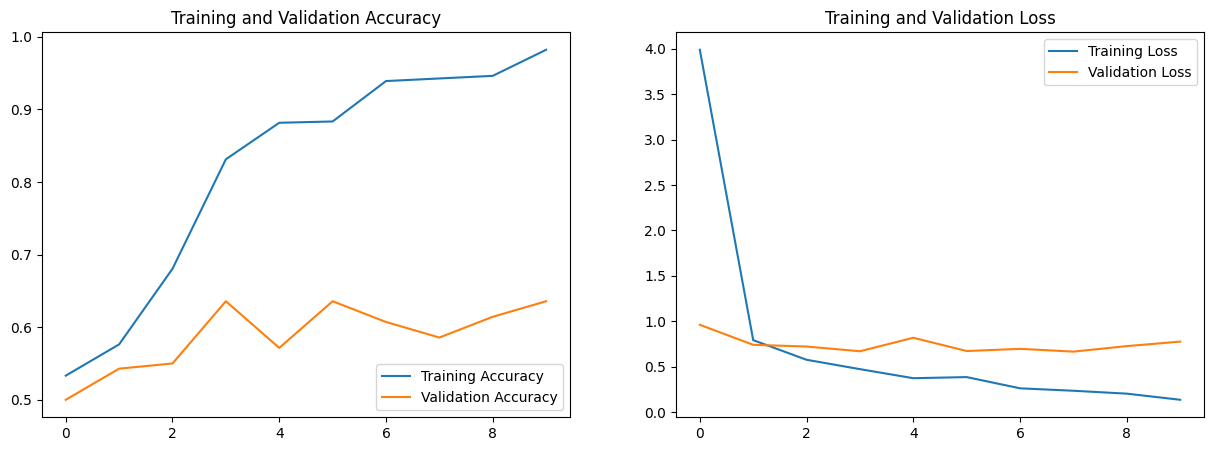

In [26]:
# Evaluate the model on the test set

validation_data_dir = '/content/drive/MyDrive/TP3_ML/cats_and_dogs/validation'
validation_datagen = ImageDataGenerator(rescale=1./255)

validation_generator = validation_datagen.flow_from_directory(
        validation_data_dir,
        target_size=(img_width, img_height),
        batch_size=batch_size,
        class_mode='binary')
        
loss, accuracy = model.evaluate(validation_generator)
print('validation loss:', loss)
print('validation accuracy:', accuracy)

# Get the predictions for the test set
validation_generator.reset()
preds = model.predict_generator(validation_generator, steps=len(validation_generator), verbose=1)
y_true = validation_generator.classes
y_pred = np.round(preds)

print(classification_report(y_true, y_pred, target_names=['cat', 'dog']))

# Plot the accuracy and loss over epochs
train_loss = history.history['loss']
val_loss = history.history['val_loss']
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

epochs_range = range(epochs)

plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, train_acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, train_loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()


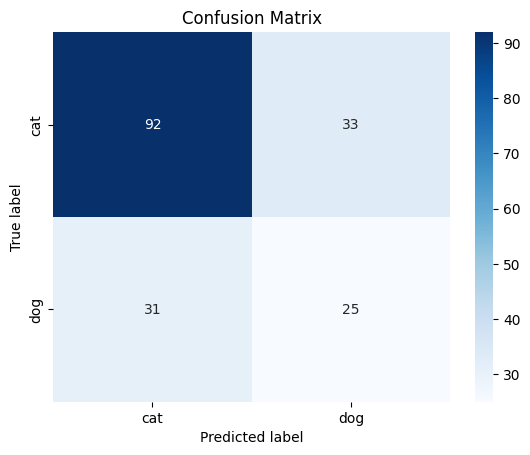

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt

# create confusion matrix
cm = confusion_matrix(y_true, y_pred)

# create labels for the classes
class_names = ['cat', 'dog']

# create heatmap
sns.heatmap(cm, annot=True, cmap='Blues', xticklabels=class_names, yticklabels=class_names)

# set axis labels
plt.xlabel('Predicted label')
plt.ylabel('True label')

# set title
plt.title('Confusion Matrix')

# show the plot
plt.show()



In [29]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(img_width, img_height, 3)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(loss='binary_crossentropy',
              optimizer=tf.keras.optimizers.Adam(lr=1e-4),
              metrics=['accuracy'])

# Train the model
history2 = model.fit_generator(
        train_generator,
        steps_per_epoch=len(train_generator),
        epochs=epochs,
        validation_data=testing_generator,
        validation_steps=len(testing_generator))


# Save the model
save_path = '/content/drive/MyDrive/TP3_ML/CNN_model_chat_chien_V2.h5'
model.save(save_path)



<ipython-input-29-e6dfbef3da0e>:20: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history2 = model.fit_generator(


Epoch 1/10
18/18 [==============================] - 46s 2s/step - loss: 0.7797 - accuracy: 0.5153 - val_loss: 0.6967 - val_accuracy: 0.5000
Epoch 2/10
18/18 [==============================] - 43s 2s/step - loss: 0.6958 - accuracy: 0.5063 - val_loss: 0.6911 - val_accuracy: 0.5500
Epoch 3/10
18/18 [==============================] - 45s 2s/step - loss: 0.6866 - accuracy: 0.5745 - val_loss: 0.6821 - val_accuracy: 0.5714
Epoch 4/10
18/18 [==============================] - 42s 2s/step - loss: 0.6728 - accuracy: 0.5727 - val_loss: 0.7010 - val_accuracy: 0.5714
Epoch 5/10
18/18 [==============================] - 43s 2s/step - loss: 0.6515 - accuracy: 0.6445 - val_loss: 0.6911 - val_accuracy: 0.5643
Epoch 6/10
18/18 [==============================] - 44s 2s/step - loss: 0.6176 - accuracy: 0.6786 - val_loss: 0.6681 - val_accuracy: 0.6500
Epoch 7/10
18/18 [==============================] - 44s 2s/step - loss: 0.5757 - accuracy: 0.6679 - val_loss: 0.6819 - val_accuracy: 0.6571
Epoch 8/10
18/18 [==

6/6 [==============================] - 7s 968ms/step - loss: 0.3575 - accuracy: 0.8895
validation loss: 0.3575473725795746
validation accuracy: 0.889502763748169


<ipython-input-33-a5d34e81c327>:9: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  preds = model.predict_generator(validation_generator, steps=len(validation_generator), verbose=1)


6/6 [==============================] - 5s 896ms/step
              precision    recall  f1-score   support

         cat       0.70      0.63      0.66       125
         dog       0.32      0.39      0.35        56

    accuracy                           0.56       181
   macro avg       0.51      0.51      0.51       181
weighted avg       0.58      0.56      0.57       181



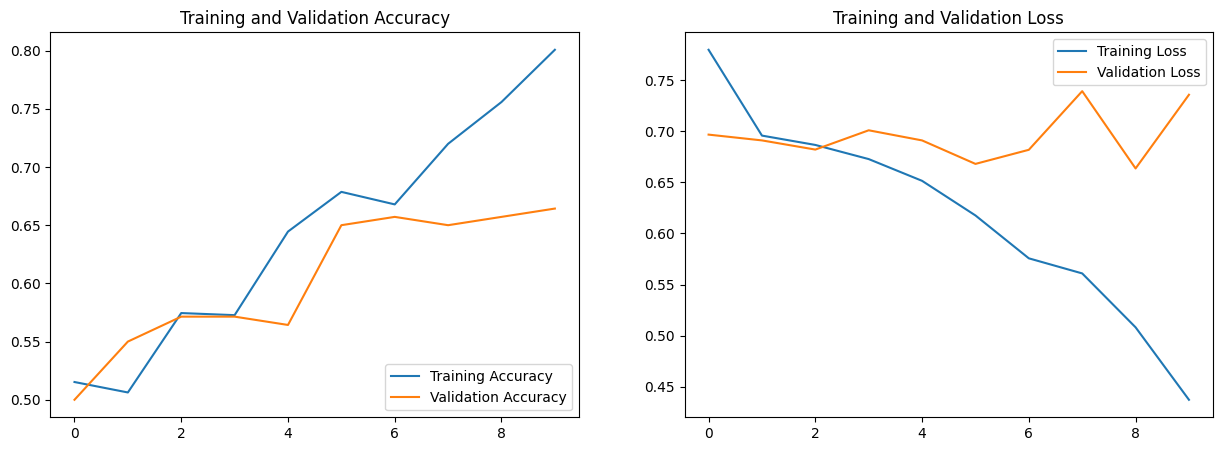

In [33]:
# Evaluate the model on the test set

loss, accuracy = model.evaluate(validation_generator)
print('validation loss:', loss)
print('validation accuracy:', accuracy)

# Get the predictions for the test set
validation_generator.reset()
preds = model.predict_generator(validation_generator, steps=len(validation_generator), verbose=1)
y_true = validation_generator.classes
y_pred = np.round(preds)

print(classification_report(y_true, y_pred, target_names=['cat', 'dog']))

# Plot the accuracy and loss over epochs
train_loss = history2.history['loss']
val_loss = history2.history['val_loss']
train_acc = history2.history['accuracy']
val_acc = history2.history['val_accuracy']

epochs_range = range(epochs)

plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, train_acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, train_loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()


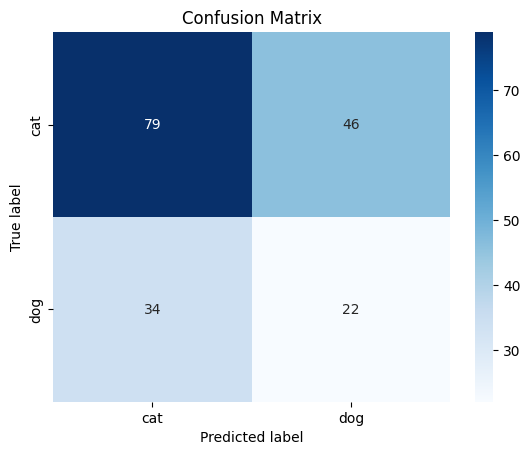

In [34]:
import seaborn as sns
import matplotlib.pyplot as plt

# create confusion matrix
cm = confusion_matrix(y_true, y_pred)

# create labels for the classes
class_names = ['cat', 'dog']

# create heatmap
sns.heatmap(cm, annot=True, cmap='Blues', xticklabels=class_names, yticklabels=class_names)

# set axis labels
plt.xlabel('Predicted label')
plt.ylabel('True label')

# set title
plt.title('Confusion Matrix')

# show the plot
plt.show()



In [43]:
import numpy as np
from tensorflow.keras.preprocessing import image


# Load the trained model
model = tf.keras.models.load_model('/content/drive/MyDrive/TP3_ML/CNN_model_chat_chien_V2.h5')

# Define the path to the image you want to classify
img_path = '/content/drive/MyDrive/TP3_ML/cats_and_dogs/validation/cats/cat_602.jpg'

# Load the image and resize it to match the input size of the model
img = image.load_img(img_path, target_size=(150, 150))

# Convert the image to a numpy array and normalize its values
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = x / 255.0

# Make a prediction using the model and print the result
prediction = model.predict(x)
if prediction[0][0] < 0.5:
    print('chat')
else:
    print('chien')


1/1 [==============================] - 0s 96ms/step
chat
